In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("https://github.com/9392473947/Datasets/raw/main/big%20mart%20sales.csv")

Data Preprocessing

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Data Cleaning

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#there are two ways to remove null values
#1) to drop the columnn
#2) to fill mean or mode in place of null values

#so here item_weight is float so we fill with mean values
#and outlite_size is categorical so fill with mode values

df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)


In [ ]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()
#so null values have been removed

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Exploratory Data Analysis

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#here item_identifier and outlier_identifier are unnecessary attributes
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [ ]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<ipython-input-19-8d63aedf001e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


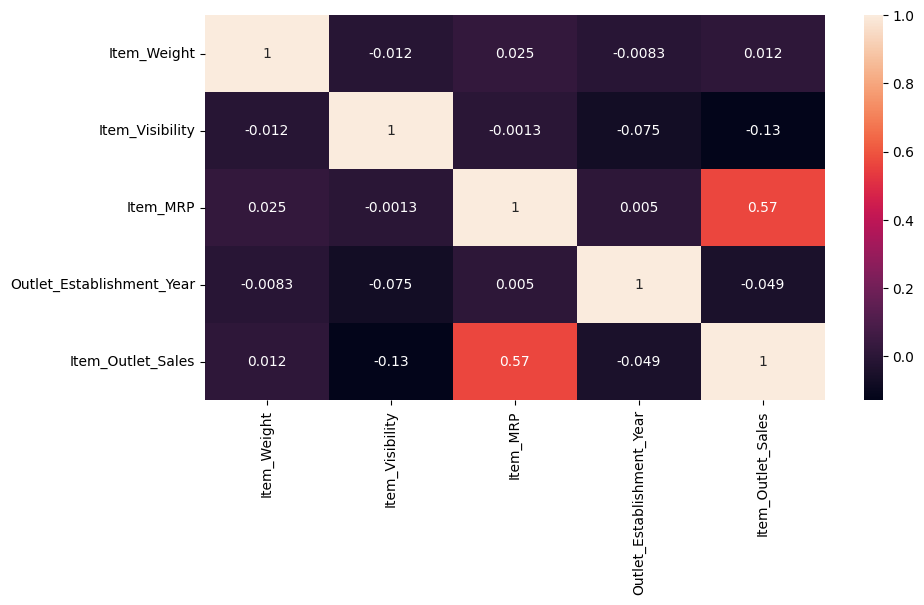

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Data Cleaning by klib

In [ ]:
import klib
klib.data_cleaning(df) #perform data cleaning(drop duplicates,empty rows/cells,adjust dtypes...)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [ ]:
df=klib.convert_datatypes(df) #converts exisiting to more efficient datatypes,also called inside data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                8523 non-null   float32 
 1   Item_Fat_Content           8523 non-null   category
 2   Item_Visibility            8523 non-null   float32 
 3   Item_Type                  8523 non-null   category
 4   Item_MRP                   8523 non-null   float32 
 5   Outlet_Establishment_Year  8523 non-null   int16   
 6   Outlet_Size                8523 non-null   category
 7   Outlet_Location_Type       8523 non-null   category
 8   Outlet_Type                8523 non-null   category
 9   Item_Outlet_Sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


In [ ]:
klib.pool_duplicate_subsets(df)

,Item_Visibility,Item_MRP,Item_Outlet_Sales,pooled_vars
0,0.016047,249.8092,3735.1380,0
1,0.019278,48.2692,443.4228,1
2,0.016760,141.6180,2097.2700,2
3,0.000000,182.0950,732.3800,3
4,0.000000,53.8614,994.7052,4
...,...,...,...,...
8518,0.056783,214.5218,2778.3834,8518
8519,0.046982,108.1570,549.2850,8519
8520,0.035186,85.1224,1193.1136,8520
8521,0.145221,103.1332,1845.5976,8521


label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
df1=df.apply(le.fit_transform)

In [ ]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,284,1,664,4,5592,4,1,0,1,2540
1,57,2,880,14,473,8,1,2,2,422
2,376,1,715,10,2901,4,1,0,1,1639
3,393,2,0,6,4227,3,1,2,0,670
4,265,1,0,9,627,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...
8518,125,1,3912,13,4955,1,0,2,1,2047
8519,233,2,3278,0,2023,5,1,1,1,516
8520,299,1,2302,8,1263,6,2,1,1,1018
8521,149,2,7174,13,1857,8,1,2,2,1466


In [ ]:
df=pd.get_dummies(df1,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
df

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,284,664,4,5592,4,2540,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,57,880,14,473,8,422,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,376,715,10,2901,4,1639,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,393,0,6,4227,3,670,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,265,0,9,627,1,865,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,125,3912,13,4955,1,2047,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,233,3278,0,2023,5,516,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
8520,299,2302,8,1263,6,1018,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,149,7174,13,1857,8,1466,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


#splitting data for train and test

In [ ]:
X=df.drop('Item_Outlet_Sales',axis=1)
X

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,284,664,4,5592,4,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,57,880,14,473,8,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,376,715,10,2901,4,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
3,393,0,6,4227,3,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,265,0,9,627,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,125,3912,13,4955,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
8519,233,3278,0,2023,5,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
8520,299,2302,8,1263,6,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
8521,149,7174,13,1857,8,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
Y=df['Item_Outlet_Sales']
Y

0       2540
1        422
2       1639
3        670
4        865
        ... 
8518    2047
8519     516
8520    1018
8521    1466
8522     697
Name: Item_Outlet_Sales, Length: 8523, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=101,test_size=0.2)

In [ ]:
np.shape(X_train)


(6818, 20)

In [ ]:
np.shape(Y_train)

(6818,)

In [ ]:
np.shape(X_test)

(1705, 20)

In [ ]:
np.shape(Y_test)

(1705,)

Standadization

In [ ]:
X.describe()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,298.756776,3708.866127,7.226681,2941.096562,3.790684,0.037076,0.597090,0.338965,0.013141,0.013728,0.109351,0.610466,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,95.451067,2396.221439,4.209990,1675.483234,2.730322,0.188960,0.490512,0.473386,0.113885,0.116365,0.312098,0.487673,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,285.000000,1595.500000,4.000000,1535.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,326.000000,3708.000000,6.000000,2949.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,361.000000,5788.500000,10.000000,4351.500000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,415.000000,7878.000000,15.000000,5937.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()

In [ ]:
X_train_std=SC.fit_transform(X_train)

In [ ]:
X_test_std=SC.fit_transform(X_test)

In [ ]:
X_train_std

array([[ 1.00439018,  0.9652137 , -0.75847359, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.23760194,  0.19203621,  1.60759199, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 1.01496562,  0.29176067,  0.66116576, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [ 0.23238346, -1.19868187,  0.18795264, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-0.09545501,  1.29985393, -1.70489982, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 0.62367454,  1.53977679,  0.4245592 , ..., -1.36686554,
         2.8659228 , -0.35759513]])

In [ ]:
X_test_std

array([[ 0.07401316,  0.05920654,  0.16640935, ..., -1.4129703 ,
         2.84062474, -0.32402203],
       [ 0.84243117, -0.42707836,  1.37376226, ...,  0.70772896,
        -0.35203524, -0.32402203],
       [-1.08872462,  0.50454992, -1.52388473, ...,  0.70772896,
        -0.35203524, -0.32402203],
       ...,
       [ 0.59977285,  1.10488618,  0.89082109, ..., -1.4129703 ,
        -0.35203524, -0.32402203],
       [ 0.7514343 , -1.53458804,  0.40787993, ..., -1.4129703 ,
         2.84062474, -0.32402203],
       [-2.2211301 , -1.45562941,  0.64935051, ...,  0.70772896,
        -0.35203524, -0.32402203]])

In [ ]:
Y_train

3684     144
1935    1311
5142    1242
4978    1426
2299    2462
        ... 
599     3137
5695    1193
8006    1684
1361    2001
1547     746
Name: Item_Outlet_Sales, Length: 6818, dtype: int64

In [ ]:
Y_test

8179     801
8355    2056
3411    1529
7089     779
6954    1858
        ... 
1317    1386
4996     808
531      356
3891    1144
6629    1839
Name: Item_Outlet_Sales, Length: 1705, dtype: int64

Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [ ]:
X_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
8179,305,3815,8,1753,8,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
8355,381,2651,13,3152,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
3411,190,4881,1,1062,2,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
7089,408,3427,6,207,7,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
6954,175,1624,3,3291,5,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
Y_pred_lr=lr.predict(X_test_std)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
r2_score(Y_test,Y_pred_lr)

0.6226099311346982

In [ ]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr))) #root mean squared error

0.6226099311346982
445.4125989597781
559.0373577541154


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
Y_pred_rf=rf.predict(X_test)

In [ ]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.611976958605371
431.06748387096775
566.8580972454976


In [ ]:
import statsmodels.api as sn
x=sn.add_constant(X)
lr=sn.OLS(df['Item_Outlet_Sales'],x).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     924.6
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:03:42   Log-Likelihood:                -65947.
No. Observations:                8523   AIC:                         1.319e+05
Df Residuals:                    8506   BIC:                         1.320e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       198.7193     20.652      9.622      0.000     158.236     239.202
Item_Weight                  -0.0166      0.064     -0.261      0.794      -0.141       0.108
Item_Visibility              -0.0036      0.003     -1.406      0.160      -0.009       0.001
Item_Type                    -0.5724      1.446     -0.396      0.692      -3.407       2.262
Item_MRP                      0.3143      0.004     87.404      0.000       0.307       0.321
Outlet_Establishment_Year    51.4029     10.281      5.000      0.000      31.250      71.556
Item_Fat_Content_0           40.1154     29.267      1.371      0.171     -17.256      97.487
Item_Fat_Content_1           30.9199     16.442      1.881      0.060      -1.310      63.150
Item_Fat_Content_2           61.4980     17.270      3.561      0.000      27.644      95.352
Item_Fat_Content_3           60.9942     44.505      1.370      0.171     -26.247     148.235
Item_Fat_Content_4            5.1918     43.793      0.119      0.906     -80.653      91.036
Outlet_Size_0               193.2178     41.934      4.608      0.000     111.018     275.418
Outlet_Size_1               -28.7016     24.516     -1.171      0.242     -76.759      19.356
Outlet_Size_2                34.2031     21.469      1.593      0.111      -7.882      76.288
Outlet_Location_Type_0      147.9763     22.800      6.490      0.000     103.283     192.669
Outlet_Location_Type_1        6.4938     25.327      0.256      0.798     -43.153      56.140
Outlet_Location_Type_2       44.2492     23.668      1.870      0.062      -2.145      90.644
Outlet_Type_0              -999.3344     18.696    -53.451      0.000   -1035.984    -962.685
Outlet_Type_1               197.1881     28.378      6.949      0.000     141.560     252.816
Outlet_Type_2              -111.1597     47.396     -2.345      0.019    -204.068     -18.252
Outlet_Type_3              1112.0253     46.233     24.053      0.000    1021.397    1202.653
==============================================================================
Omnibus:                       63.341   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.592
Skew:                          -0.210   Prob(JB):                     9.42e-15
Kurtosis:                       3.076   Cond. No.                     6.60e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.32e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""